In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
plt.style.use('fivethirtyeight')

In [2]:
courses = pd.read_csv('course_guide.csv')
courses

,uni_code,prog_code,course_name,2016_cut_off,2015_cut_off,2014_cut_off,cluster
0,UON,1263101,Bachelor of Arts,NaN,28.547,25.000,3
1,UON,1263102,Bachelor of Architectural Studies/bachelor of ...,NaN,45.341,45.328,10
2,UON,1263103,Bachelor of Quantity Surveying,NaN,44.861,44.742,10
3,UON,1263105,Bachelor of Arts (Design),NaN,40.876,40.436,14
4,UON,1263106,Bachelor of Arts (Anthropology),NaN,23.000,25.000,3
5,UON,1263107,Bachelor of Science (Actuarial Science),NaN,44.880,45.053,7
6,UON,1263108,Bachelor of Science (Industrial Chemistry),NaN,41.916,43.637,9
7,UON,1263109,Bachelor of Science (Mathematics),NaN,40.922,41.098,11
8,UON,1263110,Bachelor of Science (Meteorology),NaN,31.016,31.939,8
9,UON,1263111,Bachelor of Science (Biology),NaN,36.747,36.323,18


In [3]:
cut_off_15 = courses['2015_cut_off'].dropna()
cut_off_14 = courses['2014_cut_off'].dropna()

In [4]:
diff_15_14 = cut_off_15.sub(cut_off_14)

[ 372.   22.  102.  173.  166.  125.  132.  101.   82.   75.   68.   45.]
[ 204.   22.   84.   91.  111.  116.   90.   85.   77.   70.   64.   42.]


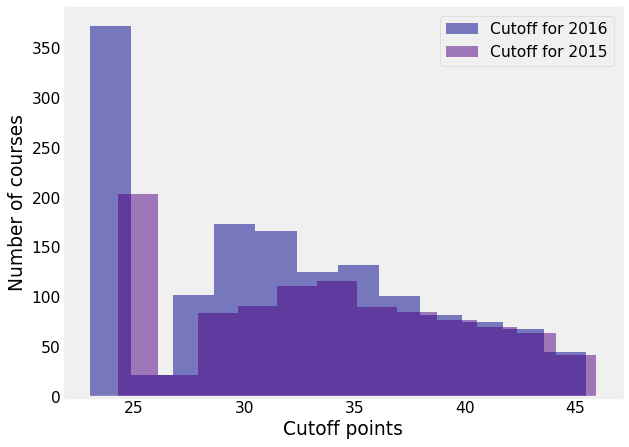

In [5]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
n, bins, patches = plt.hist(cut_off_15, 'auto', alpha =0.5, label='Cutoff for 2016', color='darkblue')
n1, bins1, patches1 = plt.hist(cut_off_14, 'auto', alpha =0.5, label='Cutoff for 2015', color='indigo')

print(n)
print(n1)

plt.grid(False)
plt.ylabel('Number of courses')
plt.xlabel('Cutoff points')
plt.legend(loc='upper right')
plt.savefig('course_hist.png', bbox_inches='tight')
plt.show()

In [6]:
print(cut_off_14.shape)
print(cut_off_15.shape)

(1056,)
(1463,)


[   3.    4.    4.    4.    8.    8.   18.    9.   20.   27.   33.   30.
  208.   71.  110.  191.  112.   54.   38.   24.   19.   15.   11.   13.
    6.    8.    5.    1.    1.    1.]
[-12.122      -11.33213333 -10.54226667  -9.7524      -8.96253333
  -8.17266667  -7.3828      -6.59293333  -5.80306667  -5.0132      -4.22333333
  -3.43346667  -2.6436      -1.85373333  -1.06386667  -0.274        0.51586667
   1.30573333   2.0956       2.88546667   3.67533333   4.4652       5.25506667
   6.04493333   6.8348       7.62466667   8.41453333   9.2044       9.99426667
  10.78413333  11.574     ]


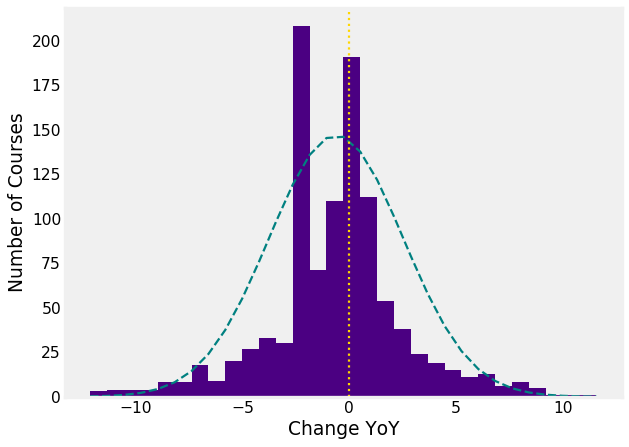

In [7]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

n, bins, patches = plt.hist(diff_15_14.dropna(), 30, color='indigo')

print(n)
print(bins)
mean = diff_15_14.mean()
sigma = diff_15_14.std()
x = bins

dx = bins[1] - bins[0]
scale = len(diff_15_14)*dx
dx = bins[1] - bins[0]
plt.plot(x, mlab.normpdf(x, mean, sigma)*scale, linewidth=2, linestyle='--', color='teal')
plt.axvline(x=0, color='gold', linewidth = 2, linestyle=':')
plt.xlabel('Change YoY')
plt.ylabel('Number of Courses')

plt.grid(False)
plt.savefig('course_yoy.png', bbox_inches='tight')
plt.show()

In [8]:
print(diff_15_14.dropna().shape)
print(diff_15_14[diff_15_14>0].shape)
print(diff_15_14[diff_15_14<0].shape)

(1056,)
(458,)
(598,)


In [9]:
598-458

140

In [10]:
140/1056

0.13257575757575757

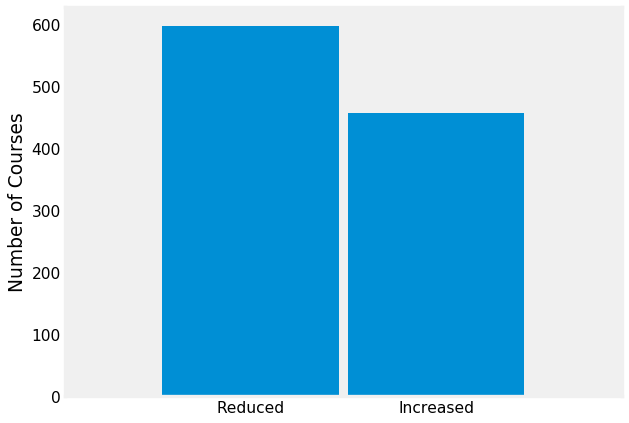

In [11]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
categories = ["Reduced", "Increased"]
values = [598, 458]
plt.bar([1,2],values, width=0.95)
plt.xticks([1,2], categories)
plt.xlim(0, 3)
plt.grid(False)
plt.ylabel('Number of Courses')
plt.savefig('reduced_increased.png', bbox_inches='tight')
plt.show()
